In [1]:
# import seaborn, pandas, numpy, and matplotlib

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load in metric_results dataframe

results = pd.read_csv("../Results/demographic_parity_metric_results.csv")

results.rename(columns = {"Female Selection Rate Before" : "Female Before", 
                          "Male Selection Rate Before" : "Male Before", 
                          "Female Selection Rate After" : "Female After", 
                          "Male Selection Rate After" : "Male After",
                          "Demographic Parity Ratio Before" : "Before ",
                          "Demographic Parity Ratio After" : "After ", 
                          "Demographic Parity Difference Before" : "Before",
                          "Demographic Parity Difference After" : "After"}, 
               inplace = True)

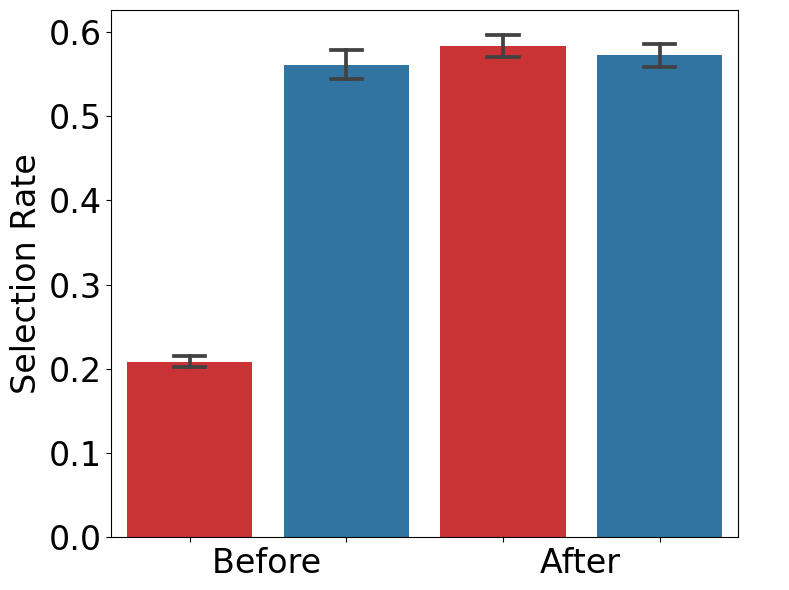

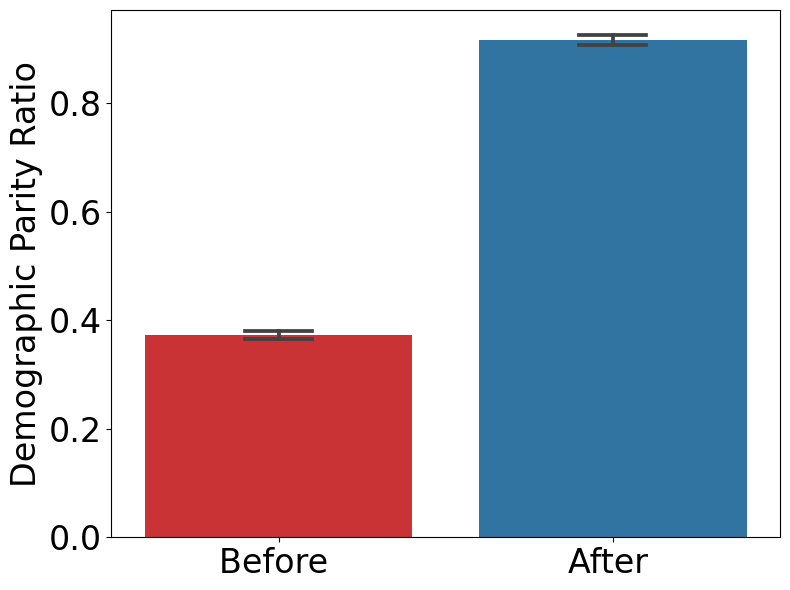

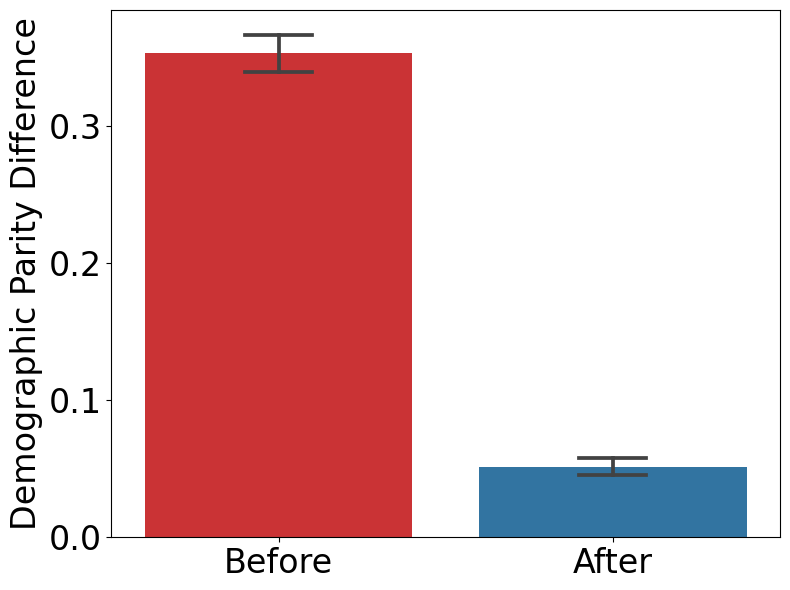

In [6]:
# define the metrics
# set up the color palette
# red for female, blue for male
# make barplots with error bars showing standard error

metrics = {
    "Selection Rate": ["Female Before", "Male Before", "Female After", "Male After"],
    "Demographic Parity Ratio": ["Before ", "After "],
    "Demographic Parity Difference": ["Before", "After"],
}

palette = {}


for metric, columns in metrics.items():
    for column in columns:
        if "Female" in column:
            palette[column] = plt.cm.Paired(5)
        elif "Male" in column:
            palette[column] = plt.cm.Paired(1)
        elif "Before" in column:
            palette[column] = plt.cm.Paired(5)
        else:
            palette[column] = plt.cm.Paired(1)
            
for metric, columns in metrics.items():
    plt.figure(figsize = (8, 6))
    
    results_metric = results[columns]
    results_metric_melted = results_metric.melt(var_name = "Gender", value_name = metric)
    
    gender = sns.barplot(x = "Gender", y = metric, data = results_metric_melted, estimator = np.mean, 
                         errorbar = "se", capsize = 0.2, palette = palette)
        
    
    if metric == "Selection Rate":        
        gender.set_xticks(range(4))
        gender.set_xticklabels(["", "Before               ", "", 
                             "After               "])
    
    plt.xlabel("")
    plt.ylabel(metric)
    plt.rc("ytick", labelsize = 24)
    plt.rc("xtick", labelsize = 24)
    plt.rc('axes', labelsize = 24)
    
    plt.tight_layout()
    
    plt.savefig(metric.lower() + ".png", dpi = 300)
    
    plt.show()